#**Eigen Centrality**

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('data2.xlsx')
data

,Type,From,To,Outcome,Goal_possesion
0,Pass,Sylvian,Henry,complete,True
1,Pass,Henry,Mayer,complete,False
2,Pass,Mayer,Martin,complete,True
3,Pass,Martin,Habib,complete,True
4,Pass,Habib,Mayer,complete,True
5,Pass,Martin,Mayer,complete,False
6,Pass,Martin,Sylvian,complete,True
7,Pass,Mayer,Sylvian,complete,True
8,Pass,Martin,Henry,complete,False


In [ ]:
data2 = data.replace({True: 1, False: 0})
data2

,Type,From,To,Outcome,Goal_possesion
0,Pass,Sylvian,Henry,complete,1
1,Pass,Henry,Mayer,complete,0
2,Pass,Mayer,Martin,complete,1
3,Pass,Martin,Habib,complete,1
4,Pass,Habib,Mayer,complete,1
5,Pass,Martin,Mayer,complete,0
6,Pass,Martin,Sylvian,complete,1
7,Pass,Mayer,Sylvian,complete,1
8,Pass,Martin,Henry,complete,0


In [ ]:
data3 = data2.replace('complete', 1)
data3

,Type,From,To,Outcome,Goal_possesion
0,Pass,Sylvian,Henry,1,1
1,Pass,Henry,Mayer,1,0
2,Pass,Mayer,Martin,1,1
3,Pass,Martin,Habib,1,1
4,Pass,Habib,Mayer,1,1
5,Pass,Martin,Mayer,1,0
6,Pass,Martin,Sylvian,1,1
7,Pass,Mayer,Sylvian,1,1
8,Pass,Martin,Henry,1,0


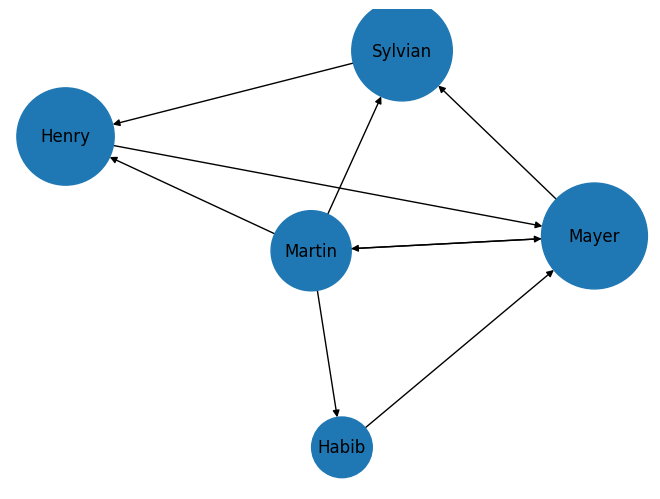

In [ ]:
#Buat graf acak dgn 10 node
G = nx.DiGraph()
for index, row, in data3.iterrows():
  From = row['From']
  To = row['To']
  Outcome = row['Outcome']
  Goal_possesion = row['Goal_possesion']
  G.add_edge(From, To, weight = Outcome+Goal_possesion)

#Hitung eigen centrality
ec = nx.eigenvector_centrality(G)

#Gambar graf
node_size = [ec[n]*10000 for n in G.nodes()]
nx.draw(G, with_labels = True, node_size = node_size)
plt.show()

In [ ]:
ec = nx.eigenvector_centrality(G, weight='weight', max_iter = 1000)

In [ ]:
degree_in = dict(G.in_degree())
degree_out = dict(G.out_degree())

for node in G.nodes():
  print('Node: ', node)
  print('Degree in: ', degree_in[node])
  print('Degree Out: ', degree_out[node])
  print('Centrality: ', 1*ec[node])
  print()

Node:  Sylvian
Degree in:  2
Degree Out:  1
Centrality:  0.5739452709981592

Node:  Henry
Degree in:  2
Degree Out:  1
Centrality:  0.5257520213556987

Node:  Mayer
Degree in:  3
Degree Out:  2
Centrality:  0.47400048660384675

Node:  Martin
Degree in:  1
Degree Out:  4
Centrality:  0.3359041670735402

Node:  Habib
Degree in:  1
Degree Out:  1
Centrality:  0.23804110397407055



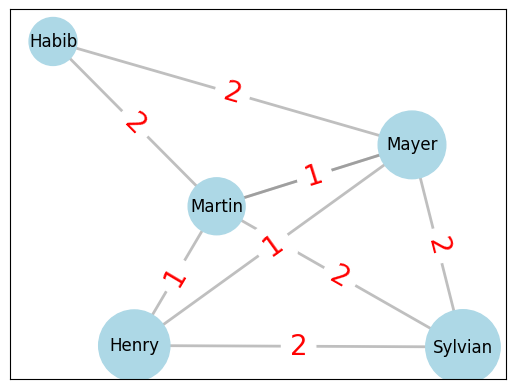

In [ ]:
node_size = [ec[n]*5000 for n in G.nodes()]
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = node_size, node_color = 'lightblue')
nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, width = 2, edge_color = 'gray', alpha = 0.5, arrows = False)
weight = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = weight, font_size = 20, font_color = 'red')
plt.axis('on')
plt.show()

In [ ]:
most_infuential_player = max(ec, key=ec.get)
print('Pemain paling berpengaruh berdasarkan riwayat hasil pertandingan dan skornya adalah: ', most_infuential_player)

Pemain paling berpengaruh berdasarkan riwayat hasil pertandingan dan skornya adalah:  Sylvian


In [ ]:
#Buat dataframe berisi node, degree in, degree out dan centrality
data = []
for node in degree_in:
  row = {'Node': node, 'Degree in': degree_in[node], 'Degree out': degree_out[node], 'Centrality': ec[node]}
  data.append(row)

hasil = pd.DataFrame(data)
hasil

,Node,Degree in,Degree out,Centrality
0,Sylvian,2,1,0.573945
1,Henry,2,1,0.525752
2,Mayer,3,2,0.474000
3,Martin,1,4,0.335904
4,Habib,1,1,0.238041


In [ ]:
hasil.to_excel('21110023_Laksmi Dyah Nurlita_Hasil.xlsx', index = False)